In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. What is the stationary state distribution of the population?
2. What is the probability that a randomly selected individual from this population at year 50 is a Maple?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Transition matrix
A = np.array([
    [0.8,  0.25, 0.10],  # to Beech
    [0.1,  0.15, 0.25],  # to Maple
    [0.1,  0.60, 0.65],  # to Other
], dtype=float)

# Initial counts (B, M, O) out of 100 trees
n0 = np.array([1, 20, 79], dtype=float)
p0 = n0 / n0.sum()  # proportions

# Stationary distribution via eigenvector for eigenvalue 1
eigvals, eigvecs = np.linalg.eig(A)
idx = int(np.argmin(np.abs(eigvals - 1.0)))
stationary = np.real(eigvecs[:, idx])
stationary = stationary / stationary.sum()

# Project to year 50
T = 50
p = p0.copy()
for _ in range(T):
    p = A @ p
p50 = p

labels = ["Beech", "Maple", "Other"]

def as_counts(proportions, total=100):
    counts = np.rint(proportions * total).astype(int)
    diff = total - counts.sum()
    if diff != 0:
        fracs = proportions * total - np.floor(proportions * total)
        order = np.argsort(-fracs)
        for k in order[:abs(diff)]:
            counts[k] += 1 if diff > 0 else -1
    return counts

# Print results
print("Stationary state distribution (proportions):")
for lab, val in zip(labels, stationary):
    print(f"  {lab}: {val:.6f}")
print("\nYear 50 proportions:")
for lab, val in zip(labels, p50):
    print(f"  {lab}: {val:.6f}")
print(f"\nProbability a randomly selected tree is Maple in year 50: {p50[1]:.6f} ({p50[1]*100:.2f}%)")

# Full trajectory for 0..T
traj = np.zeros((T+1, 3), dtype=float)
traj[0] = p0
for t in range(1, T+1):
    traj[t] = A @ traj[t-1]




Stationary state distribution (proportions):
  Beech: 0.418440
  Maple: 0.170213
  Other: 0.411348

Year 50 proportions:
  Beech: 0.418440
  Maple: 0.170213
  Other: 0.411348

Probability a randomly selected tree is Maple in year 50: 0.170213 (17.02%)


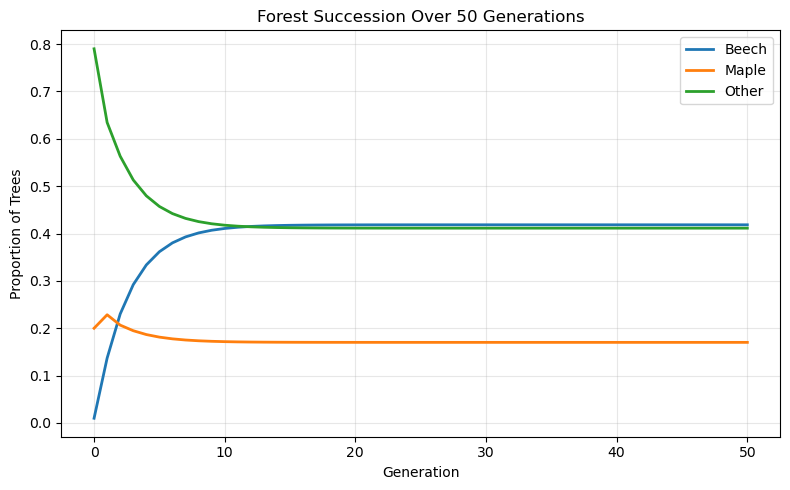

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Transition matrix 
A = np.array([
    [0.8,  0.25, 0.10],  # Beech
    [0.1,  0.15, 0.25],  # Maple
    [0.1,  0.60, 0.65],  # Other
])

# Initial proportions (Beech, Maple, Other)
n0 = np.array([1, 20, 79], dtype=float)
p0 = n0 / n0.sum()

# Simulate for 50 generations
T = 50
traj = np.zeros((T + 1, 3))
traj[0] = p0
for t in range(1, T + 1):
    traj[t] = A @ traj[t - 1]

# Create line graph
plt.figure(figsize=(8,5))
plt.plot(range(T + 1), traj[:,0], label="Beech", linewidth=2)
plt.plot(range(T + 1), traj[:,1], label="Maple", linewidth=2)
plt.plot(range(T + 1), traj[:,2], label="Other", linewidth=2)

# Graph labels and style
plt.xlabel("Generation")
plt.ylabel("Proportion of Trees")
plt.title("Forest Succession Over 50 Generations")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()




Probability of permanent loss by year 50: 0.761328 (76.13%)
Probability of still being in state 1/1 at year 50: 0.031657 (3.17%)


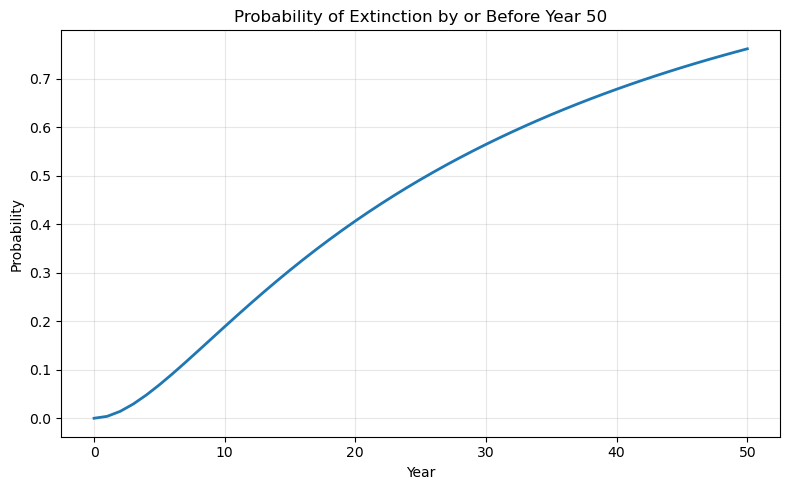

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
eA = 0.03  
eB = 0.13  
cA = 0.02 
cB = 0.02  

A = np.array([
    [1.0,                 eA*(1 - cB),      (1 - cA)*eB,       eA*eB],
    [0.0,           (1 - eA)*(1 - cB),          cA*eB,   (1 - eA)*eB],
    [0.0,                  eA*cB,      (1 - cA)*(1 - eB),   eA*(1 - eB)],
    [0.0,            (1 - eA)*cB,       cA*(1 - eB),   (1 - eA)*(1 - eB)]
], dtype=float)  

p0 = np.array([0.0, 0.0, 0.0, 1.0])

# Project 50 years
T = 50
p = p0.copy()
traj = np.zeros((T + 1, 4))
traj[0] = p
for t in range(1, T + 1):
    p = A @ p
    traj[t] = p

# Results at year 50
p_ext_by50 = traj[T, 0]        
p_in_11_by50 = traj[T, 3]    

print(f"Probability of permanent loss by year 50: {p_ext_by50:.6f} ({p_ext_by50*100:.2f}%)")
print(f"Probability of still being in state 1/1 at year 50: {p_in_11_by50:.6f} ({p_in_11_by50*100:.2f}%)")

years = np.arange(T + 1)
plt.figure(figsize=(8,5))
plt.plot(years, traj[:, 0], linewidth=2)
plt.xlabel("Year")
plt.ylabel("Probability")
plt.title("Probability of Extinction by or Before Year 50")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
